In [ ]:
import math
import random
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

In [ ]:
# choosing r and b
t = 200
tau_js = 0.75

b = -math.log(t,tau_js)
r = t/b
1/r ** (1/b)


0.8785349341564557

In [ ]:
D = {'AB': 0.77, 'AC': 0.25, 'AD': 0.33, 'BC': 0.2, 'BD': 0.55, 'CD': 0.91}
r = 16
b = 12.5
for i,s in enumerate(D.values()):
    D[list(D.keys())[i]] = 1 - (1-s**b)**r
D

{'AB': 0.463034660558881,
 'AC': 4.7683705162171464e-07,
 'AD': 1.5329963128030144e-05,
 'BC': 2.930858888916532e-08,
 'BD': 0.00905323267301461,
 'CD': 0.9972107202823838}

In [ ]:
r = [1,2,4,5,8,10, 12.5, 200, 100, 50, 40, 25, 20, 16 ]
b = [200, 100, 50, 40, 25, 20, 16, 1,2,4,5,8,10, 12.5]

for i in range(len(r)):
    print("r: ", r[i], "| b: ", b[i], "| approx: ", 1/r[i] ** (1/b[i]))

r:  1 | b:  200 | approx:  1.0
r:  2 | b:  100 | approx:  0.9930924954370358
r:  4 | b:  50 | approx:  0.9726549474122855
r:  5 | b:  40 | approx:  0.9605627697295936
r:  8 | b:  25 | approx:  0.9201876506248752
r:  10 | b:  20 | approx:  0.8912509381337456
r:  12.5 | b:  16 | approx:  0.853971002857656
r:  200 | b:  1 | approx:  0.005
r:  100 | b:  2 | approx:  0.1
r:  50 | b:  4 | approx:  0.3760603093086394
r:  40 | b:  5 | approx:  0.4781762498950185
r:  25 | b:  8 | approx:  0.668740304976422
r:  20 | b:  10 | approx:  0.7411344491069477
r:  16 | b:  12.5 | approx:  0.8010698775896221


In [ ]:
r_b

{1: 0.08471552471836663, 2: 1.0, 4: 1.0, 5: 1.0, 8: 1.0, 10: 0.999999999275888}

In [ ]:
def random_unit_vector(dim):
  random_vector = []

  for d in range(int(dim/2)):

    u1 = random.uniform(0,1)
    u2 = random.uniform(0,1)

    y1 = math.sqrt(-2*np.log(u1))*math.cos(2*np.pi*u2)
    y2 = math.sqrt(-2*np.log(u1))*math.sin(2*np.pi*u2)

    random_vector.append(y1)
    random_vector.append(y2)

  unit_vector = random_vector/np.linalg.norm(random_vector)

  return unit_vector

random_unit_vector(10)

array([-0.05841863, -0.45604173, -0.21721037,  0.67171325,  0.04858661,
        0.23626545,  0.10112409,  0.34509894, -0.19294789, -0.2559373 ])

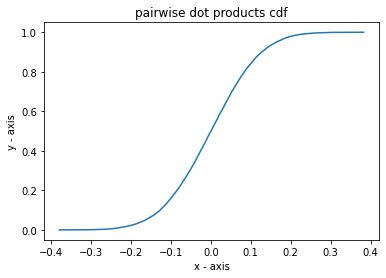

In [ ]:
t = 200
d = 100
t_unit_vectors = []
for i in range(t):
  t_unit_vectors.append(random_unit_vector(d))

comb = list(combinations(np.arange(len(t_unit_vectors)), 2))
pairwise_dotproduct = []
for c in comb:
  pairwise_dotproduct.append(np.dot(t_unit_vectors[c[0]], t_unit_vectors[c[1]]))


x = np.sort(pairwise_dotproduct)
y = np.arange(len(comb))/float(len(comb))
# ya = np.exp(-x**2)
# ya/=(ya*0.05).sum()
# y = np.cumsum(ya*0.05)
# plotting the line 2 points 
plt.plot(x, y)
  
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('pairwise dot products cdf')
plt.show()


In [ ]:
n = 500
d = 100
tau_js = 0.75

def angular_similarities(a, b):
    anorm = np.linalg.norm(a)
    bnorm = np.linalg.norm(b)
    dot_product = np.dot(a,b)/(anorm * bnorm)
    return 1- np.arccos(dot_product)/np.pi


In [ ]:
dataset = np.loadtxt('/content/drive/MyDrive/Spring2023/CS4140/R.txt', delimiter=' ')
dataset = dataset[0:n]

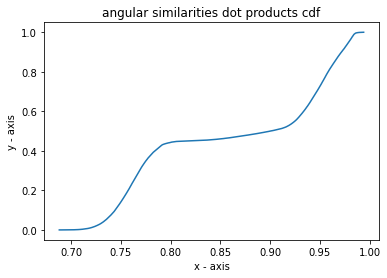

In [ ]:
comb = list(combinations(np.arange(len(dataset)), 2))
dotproduct_angular_similarities = []
count = 0
for c in comb:
    angular_similarity = angular_similarities(dataset[c[0]], dataset[c[1]])
    dotproduct_angular_similarities.append(angular_similarity)
    if angular_similarity > 0.75:
      count += 1

x = np.sort(dotproduct_angular_similarities)
y = np.arange(len(comb))/float(len(comb))

plt.plot(x, y)
  
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('angular similarities dot products cdf')
plt.show()

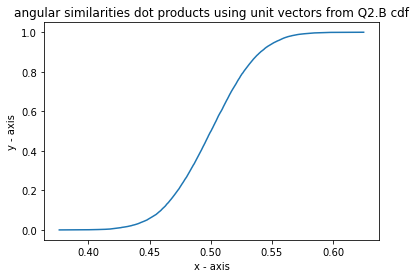

In [ ]:
comb = list(combinations(np.arange(len(t_unit_vectors)), 2))
dotproduct_angular_similarities_t = []
count = 0
for c in comb:
    angular_similarity = angular_similarities(t_unit_vectors[c[0]], t_unit_vectors[c[1]])
    dotproduct_angular_similarities_t.append(angular_similarity)
    if angular_similarity > 0.75:
      count += 1
      
x = np.sort(dotproduct_angular_similarities_t)
y = np.arange(len(comb))/float(len(comb))

plt.plot(x, y)
  
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('angular similarities dot products using unit vectors from Q2.B cdf')
plt.show()